In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam



In [2]:
df = pd.read_csv("d:\\jupyter\\blood\\transfusion.csv")
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
1114,2,20,5000,45,1
1115,2,50,12500,98,1
1116,0,13,3250,28,1
1117,1,16,4000,35,1


In [12]:
df.shape

(1119, 5)

In [13]:
df.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [14]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [15]:
df.groupby('whether he/she donated blood in March 2007').size()

whether he/she donated blood in March 2007
0    570
1    549
dtype: int64

In [16]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [2]:
import pandas as pd
from pandas import set_option
myFilename="d:\\jupyter\\blood\\transfusion.csv"
names=['Recency (months)',	'Frequency (times)',	'Monetary (c.c. blood)',	'Time (months)',	'whether he/she donated blood in March 2007']
myData=pd.read_csv(myFilename)
set_option('display.width', 100)
set_option('display.precision',3)
correlations= myData.corr(method='pearson')
print(correlations)

                                            Recency (months)  Frequency (times)  \
Recency (months)                                       1.000             -0.375   
Frequency (times)                                     -0.375              1.000   
Monetary (c.c. blood)                                 -0.375              1.000   
Time (months)                                         -0.024              0.753   
whether he/she donated blood in March 2007            -0.530              0.543   

                                            Monetary (c.c. blood)  Time (months)  \
Recency (months)                                           -0.375         -0.024   
Frequency (times)                                           1.000          0.753   
Monetary (c.c. blood)                                       1.000          0.753   
Time (months)                                               0.753          1.000   
whether he/she donated blood in March 2007                  0.543          0.198 

<Axes: ylabel='Frequency'>

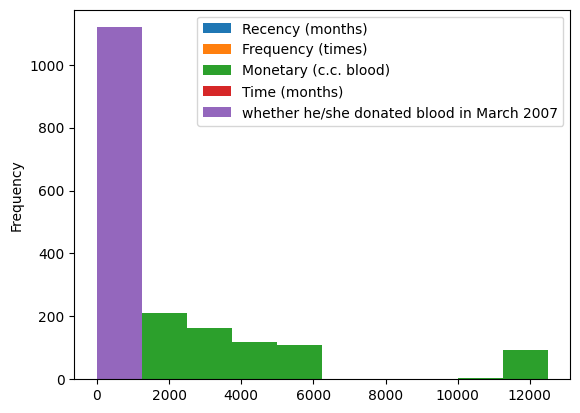

In [3]:
import matplotlib.pyplot as plt

myData.plot.hist()

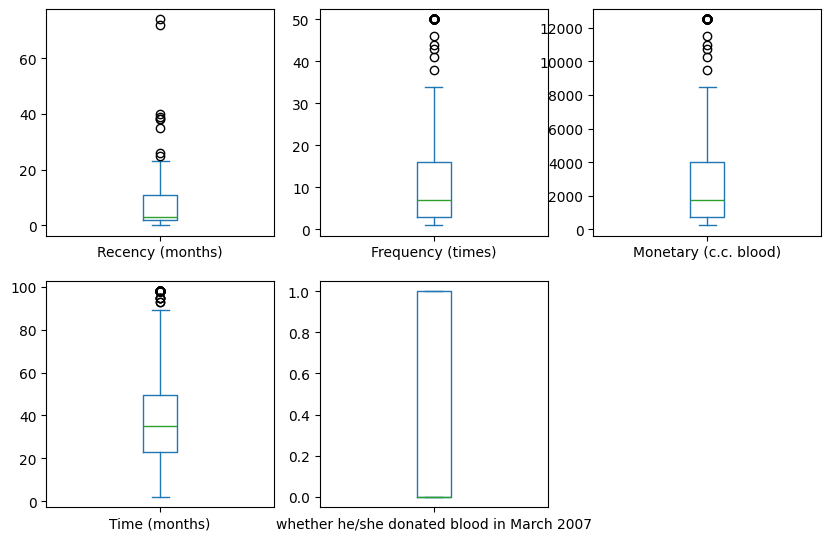

In [4]:
import pandas as pd
from pandas import set_option
myFilename="d:\\jupyter\\blood\\transfusion.csv"
names=['Recency (months)',	'Frequency (times)',	'Monetary (c.c. blood)',	'Time (months)',	'whether he/she donated blood in March 2007']
myData=pd.read_csv(myFilename)
myData.plot(kind='box',subplots=True,layout=(3,3),sharex=False, sharey=False,figsize=(10,10))
plt.show()

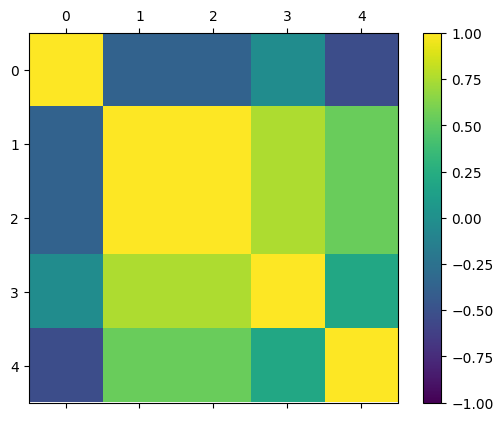

In [6]:
correlations = myData.corr()
# plot correlation matrix

myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"

cax = axis.matshow(correlations, vmin =-1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 5, 1) # np.arange(start, stop, step); the interval does not include stop value

axis.set_xticks(ticks)
axis.set_yticks(ticks)

plt.show()

In [7]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

data = myData.values
X = data[:,0:4]
Y = data[:,4]
mydataScaler = MinMaxScaler(feature_range = (0, 1))
mydataRescaled = mydataScaler.fit_transform(X)
set_printoptions(precision = 3)
print(mydataRescaled[20:25,:])

[[0.027 0.041 0.041 0.021]
 [0.054 0.204 0.204 0.271]
 [0.027 0.102 0.102 0.146]
 [0.027 0.102 0.102 0.146]
 [0.122 0.163 0.163 0.146]]


In [8]:
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

mydata_train=data[:,0:4]
mydata_label=data[:,4]
mydataScaler=Normalizer().fit(mydata_train)
mydataNormalized=mydataScaler.transform(mydata_train)
set_printoptions(precision=3)
print(mydataNormalized[20:25,:])

[[0.003 0.004 1.    0.005]
 [0.001 0.004 1.    0.01 ]
 [0.001 0.004 1.    0.011]
 [0.001 0.004 1.    0.011]
 [0.004 0.004 1.    0.007]]


In [9]:
from sklearn.preprocessing import Binarizer

mydata_train=data[:,0:4]
mydata_label=data[:,4]
mydataBinarizer=Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized=mydataBinarizer.transform(mydata_train)
set_printoptions(precision=3)
print(mydatabinarized[0:5,:])

[[1 1 1 1]
 [0 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [10]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data=myData.values
mydata_train=data[:,0:4]
mydata_label=data[:,4]
#featureextraction
myFeature=SelectKBest(score_func=chi2,k=4) #kisnumberoftopfeaturestoselect
fit=myFeature.fit(mydata_train,mydata_label)
#summarizescores
set_printoptions(precision=3)
print(fit.scores_)

[2.741e+03 4.883e+03 1.221e+06 7.803e+02]


In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data=myData.values

mydata_train= data[:,0:4]
mydata_label= data[:,4]
# featureextraction
model=LogisticRegression()
mydataRFE= RFE(model,n_features_to_select=3)
mydataFit=mydataRFE.fit(mydata_train,mydata_label)
print("Numberoffeatures:%d" %mydataFit.n_features_)
print("SelectedfeaturesaredenotedbyTrue:%s"%mydataFit.support_)
print("FeatureRanking:%s" %mydataFit.ranking_)

Numberoffeatures:3
SelectedfeaturesaredenotedbyTrue:[ True False  True  True]
FeatureRanking:[1 2 1 1]


In [12]:
from sklearn.decomposition import PCA

# featureextraction
pca=PCA(n_components=3)
fit=pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [1.000e+00 2.894e-05 3.676e-06]
[[-8.704e-04  4.000e-03  1.000e+00  6.053e-03]
 [ 1.944e-01 -2.307e-05 -5.769e-03  9.809e-01]
 [ 9.809e-01  8.122e-06  2.031e-03 -1.944e-01]]


In [13]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print(selectedFeatures.shape)

(1119, 1)


In [14]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print(selectedFeatures.shape)

(1119, 1)


In [15]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.231 0.26  0.262 0.247]


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(mydata_train, mydata_label, test_size = 0.33,
 random_state = 42)

X_train
X_test

Y_train
Y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [9]:
X = df.drop(columns=['whether he/she donated blood in March 2007'])
y = df['whether he/she donated blood in March 2007']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##scaler = StandardScaler()
##X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
##X_test = scaler.transform(X_test) 

model_dl = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model_dl.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

loss, accuracy_dl = model_dl.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy_dl:.4f}')

Epoch 1/100


c:\Users\elahehba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6692 - loss: 5.0389 - val_accuracy: 0.7946 - val_loss: 0.8571
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8503 - loss: 0.6900 - val_accuracy: 0.7634 - val_loss: 1.5554
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7763 - loss: 1.4623 - val_accuracy: 0.7679 - val_loss: 1.1788
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.9405 - val_accuracy: 0.7857 - val_loss: 1.5779
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 1.0789 - val_accuracy: 0.7054 - val_loss: 3.9773
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7185 - loss: 3.2365 - val_accuracy: 0.7589 - val_loss: 2.1390
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8182 - loss: 1.2472 - val_accuracy: 0.7634 - val_loss: 1.5849
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7773 - loss: 1.7250 - val_accuracy: 0.7857

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('d:\\jupyter\\blood\\transfusion.csv')  

X = data.drop(columns=['whether he/she donated blood in March 2007'])
y = data['whether he/she donated blood in March 2007']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 77.23%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('d:\\jupyter\\blood\\transfusion.csv') 

X = data.drop(columns=['whether he/she donated blood in March 2007'])
y = data['whether he/she donated blood in March 2007']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 80.80%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('d:\\jupyter\\blood\\transfusion.csv')  

X = data.drop(columns=['whether he/she donated blood in March 2007'])
y = data['whether he/she donated blood in March 2007']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred = dt_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 79.91%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('d:\\jupyter\\blood\\transfusion.csv')  

X = data.drop(columns=['whether he/she donated blood in March 2007'])
y = data['whether he/she donated blood in March 2007']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

y_pred = logreg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 80.80%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv('d:\\jupyter\\blood\\transfusion.csv') 

X = data.drop(columns=['whether he/she donated blood in March 2007'])
y = data['whether he/she donated blood in March 2007']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_model = SVC(kernel='linear', random_state=42)  
svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 80.36%
